In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from glob import glob

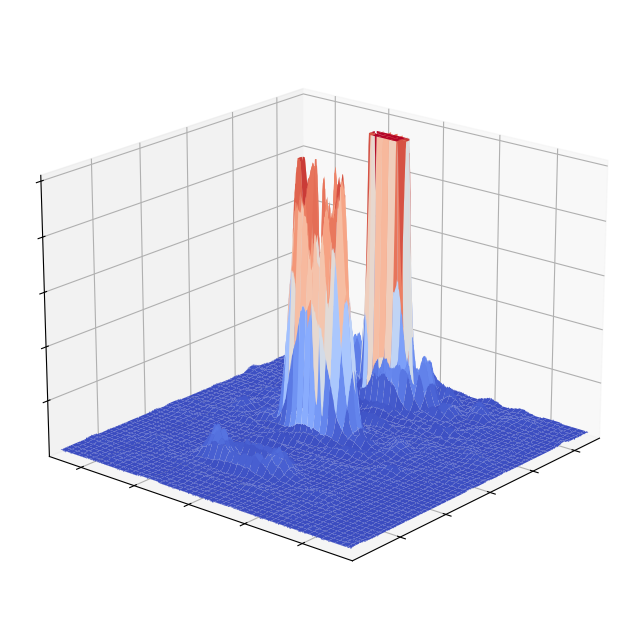

In [12]:
# Abre la imagen
image = Image.open('D:\Genaro\Experimentos Cuanticos II\Exp.-Cuanticos-II\TP4- MAO en haces opticos\Resultados FINALLY\Desplazada2_Lente_1m_DPI_1200_Carga_1_F_8_T_336_Sin Saturar.bmp').convert('L')  # Convierte a escala de grises
data = np.array(image)

# Normaliza los datos
data_normalized = (data) / (np.max(data))

# Obtén las dimensiones
height, width = data.shape
x = np.arange(0, width)
y = np.arange(0, height)
x, y = np.meshgrid(x, y)

# Visualiza en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define los límites que quieres visualizar
x_min, x_max = 100, width-100  # Ejemplo: visualiza desde la columna 50 a la 150
y_min, y_max = 250, height-250  # Ejemplo: visualiza desde la fila 20 a la 120

# Asegúrate de que los límites estén dentro de las dimensiones de los datos
x_min = max(x_min, 0)
x_max = min(x_max, width)
y_min = max(y_min, 0)
y_max = min(y_max, height)

# Recorta los datos y las coordenadas
data_to_plot = data_normalized[y_min:y_max, x_min:x_max]
x_to_plot = x[y_min:y_max, x_min:x_max]
y_to_plot = y[y_min:y_max, x_min:x_max]

# Grafica la superficie con los datos seleccionados
surf = ax.plot_surface(x_to_plot, y_to_plot, data_to_plot, cmap='coolwarm')

# Ajusta los límites de los ejes X, Y y Z según los datos seleccionados
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(np.min(data_to_plot), np.max(data_to_plot))

# Oculta los valores de los ejes
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# Rotación
ax.view_init(elev=20, azim=40)  # Cambia el ángulo de elevación y el azimut

plt.savefig('Carga_1_f8.png', format='png', dpi=1000, bbox_inches='tight')

plt.show()